**Surabaya Bus Route Map**

Take a look [the map ](https://www.google.com/maps/d/u/0/viewer?mid=1vIuyfh-Fwj-48oe3wE2PFh34tSPnJZFS&hl=en_US&ll=-7.277209142377289%2C112.70481274999999&z=12)

In [28]:
## Aulia Cisatra
## 5026201124

Based on the map, create a vocabulary for the Surabaya Bus route map

In [57]:

%reload_ext jupyter-rdfify


In [58]:
    %%rdf turtle -p
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

Turtle: Stored prefix.


Make a Vocabulary Turtle based on that. Make sure the vocabulary and instances can use the entailment regime

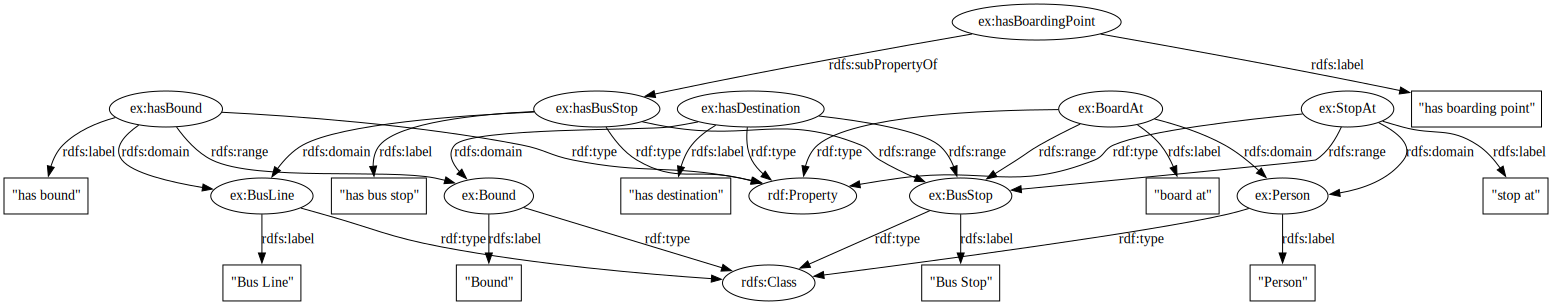

In [72]:
%%rdf turtle -l bus

# Make Halte class
@prefix ex: <http://example.org/> .

# Class & Property
#Define BusStop Class
ex:BusStop a rdfs:Class ;
    rdfs:label "Bus Stop" .

#Define BusLine Class
ex:BusLine a rdfs:Class ;
    rdfs:label "Bus Line" .

#Define Person Class
ex:Person a rdfs:Class ;
    rdfs:label "Person" .
    
#Define Bound Class
ex:Bound a rdfs:Class ;
    rdfs:label "Bound" .
    
# Define StopAt & BoardAt property to link a person to a bus stop
ex:StopAt a rdf:Property ;
    rdfs:label "stop at" ;
    rdfs:domain ex:Person ;
    rdfs:range ex:BusStop .

ex:BoardAt a rdf:Property ;
    rdfs:label "board at" ;
    rdfs:domain ex:Person ;
    rdfs:range ex:BusStop .

# Define the hasBusStop & hadBoardingPoint property to link a bus line to a bus stop
ex:hasBusStop a rdf:Property ;
    rdfs:label "has bus stop" ;
    rdfs:domain ex:BusLine ;
    rdfs:range ex:BusStop .
    
ex:hasBoardingPoint rdfs:subPropertyOf ex:hasBusStop ;
    rdfs:label "has boarding point" .
    
# Define the hasBound & hadDestination property to link a bus line to a bound
ex:hasBound a rdf:Property ;
    rdfs:label "has bound" ;
    rdfs:domain ex:BusLine ;
    rdfs:range ex:Bound .
    
ex:hasDestination a rdf:Property ;
    rdfs:label "has destination" ;
    rdfs:domain ex:Bound ;
    rdfs:range ex:BusStop .


Create an instance for a single line/route and coonect your data to another dataset

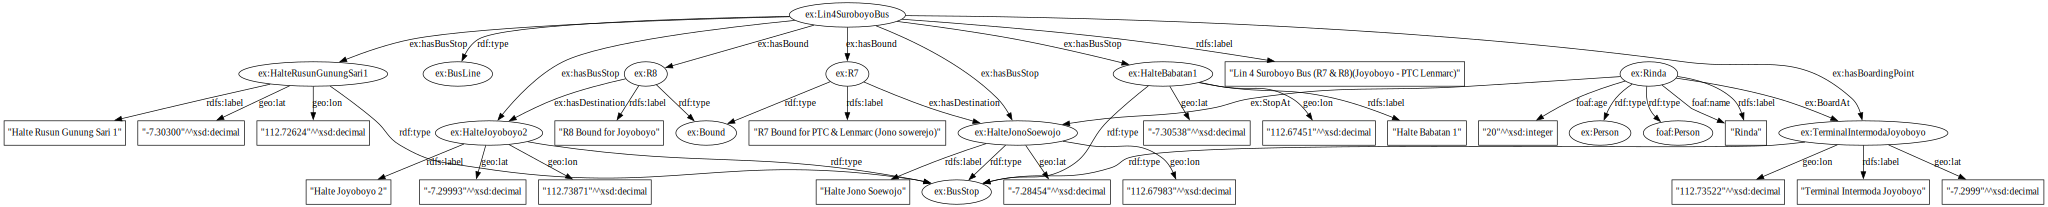

In [73]:
%%rdf turtle -l busIns
@prefix ex: <http://example.org/> .
@prefix geo: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

#Define BusLine Instance
ex:Lin4SuroboyoBus a ex:BusLine ;
    rdfs:label "Lin 4 Suroboyo Bus (R7 & R8)(Joyoboyo - PTC Lenmarc)" .
    
#Define BusStop Instance
ex:HalteRusunGunungSari1 a ex:BusStop ;
    rdfs:label "Halte Rusun Gunung Sari 1" ;
    geo:lat "-7.30300"^^xsd:decimal ;
    geo:lon "112.72624"^^xsd:decimal .

ex:HalteBabatan1 a ex:BusStop ;
    rdfs:label "Halte Babatan 1" ;
    geo:lat "-7.30538"^^xsd:decimal ;
    geo:lon "112.67451"^^xsd:decimal .
    
ex:TerminalIntermodaJoyoboyo a ex:BusStop ;
    rdfs:label "Terminal Intermoda Joyoboyo" ;
    geo:lat "-7.2999"^^xsd:decimal ;
    geo:lon "112.73522"^^xsd:decimal .
    
ex:HalteJonoSoewojo a ex:BusStop ;
    rdfs:label "Halte Jono Soewojo" ;
    geo:lat "-7.28454"^^xsd:decimal ;
    geo:lon "112.67983"^^xsd:decimal .

ex:HalteJoyoboyo2 a ex:BusStop ;
    rdfs:label "Halte Joyoboyo 2" ;
    geo:lat "-7.29993"^^xsd:decimal ;
    geo:lon "112.73871"^^xsd:decimal .

#Define Bound Instance
ex:R7 a ex:Bound ;
    rdfs:label "R7 Bound for PTC & Lenmarc (Jono sowerejo)" .
ex:R8 a ex:Bound ;
    rdfs:label "R8 Bound for Joyoboyo" .
    
#Define Person Instance
ex:Rinda a ex:Person, foaf:Person ;
    rdfs:label "Rinda" ;
    foaf:name "Rinda" ;
    foaf:age "20"^^xsd:integer .


#Triple
#Boarding Point
ex:Lin4SuroboyoBus ex:hasBoardingPoint ex:TerminalIntermodaJoyoboyo . 

#Bus Stop
ex:Lin4SuroboyoBus ex:hasBusStop ex:HalteRusunGunungSari1 .
ex:Lin4SuroboyoBus ex:hasBusStop ex:HalteBabatan1 .
ex:Lin4SuroboyoBus ex:hasBusStop ex:HalteJonoSoewojo .
ex:Lin4SuroboyoBus ex:hasBusStop ex:HalteJoyoboyo2 .

#Bound
ex:Lin4SuroboyoBus ex:hasBound ex:R7 .
ex:Lin4SuroboyoBus ex:hasBound ex:R8 .
        
#Destination
ex:R7 ex:hasDestination ex:HalteJonoSoewojo .
ex:R8 ex:hasDestination ex:HalteJoyoboyo2 .

#Rinda
ex:Rinda ex:BoardAt ex:TerminalIntermodaJoyoboyo .
ex:Rinda ex:StopAt ex:HalteJonoSoewojo .
    


Create two SPARQL for querying your data

Query to find what bus line & bound that rinda takes to go to Her destination

In [77]:
%%rdf sparql -l busIns -s busQuery

SELECT ?buslinename ?boundname
WHERE {
    ex:Rinda ex:StopAt ?destination .
    ?bound ex:hasDestination ?destination .
    ?bound rdfs:label ?boundname .
    
    ?busline ex:hasBound ?bound .
    ?busline rdfs:label ?buslinename .
}

?buslinename,?boundname
Lin 4 Suroboyo Bus (R7 & R8)(Joyoboyo - PTC Lenmarc),R7 Bound for PTC & Lenmarc (Jono sowerejo)


Query to find name of people and what busline they take based on boarding point

In [78]:
%%rdf sparql -l busIns -s 1c
SELECT ?name ?linename
WHERE{
    ?person ex:BoardAt ex:TerminalIntermodaJoyoboyo  .
    ?line ex:hasBoardingPoint ex:TerminalIntermodaJoyoboyo  .
    
    ?person foaf:name ?name .
    ?line rdfs:label ?linename .
}

?name,?linename
Rinda,Lin 4 Suroboyo Bus (R7 & R8)(Joyoboyo - PTC Lenmarc)
